In [2]:
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
df = pd.read_excel("C:/Users/RUCHI/Downloads/RBD.xlsx")

In [4]:
df

,System A,System B,System C
0,15,15,18
1,14,14,14
2,10,11,15
3,13,12,17
4,16,13,16
5,13,13,13


In [5]:
data = pd.melt(df.reset_index(),id_vars=["index"],value_vars=["System A","System B","System C"])
data.columns =["index","treatments","value"]
data

,index,treatments,value
0,0,System A,15
1,1,System A,14
2,2,System A,10
3,3,System A,13
4,4,System A,16
5,5,System A,13
6,0,System B,15
7,1,System B,14
8,2,System B,11
9,3,System B,12


In [6]:
model = ols('value ~ C(treatments)',data=data).fit()
model.summary()

C:\Users\RUCHI\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     3.214
Date:                Sun, 06 Mar 2022   Prob (F-statistic):             0.0689
Time:                        17:30:07   Log-Likelihood:                -34.554
No. Observations:                  18   AIC:                             75.11
Df Residuals:                      15   BIC:                             77.78
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    13.5000      0.738     18.296      0.000      11.927      15.073
C(treatments)[T.System B]    -0.5000      1.043     -0.479      0.639      -2.724       1.724
C(treatments)[T.System C]     2.0000      1.043      1.917      0.075      -0.224       4.224
==============================================================================
Omnibus:                        0.471   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.790   Jarque-Bera (JB):                0.558
Skew:                          -0.297   Prob(JB):                        0.757
Kurtosis:                       2.375   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
anova_table= sm.stats.anova_lm(model,typ=1)  #WITHOUT BLOCKING 
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),2.0,21.0,10.500000,3.214286,0.068903
Residual,15.0,49.0,3.266667,NaN,NaN


In [10]:
data.columns=['blocks','treatments','value']     #WITH APPLYING BLOCKING THAT IS RBD
model = ols('value ~ C(blocks)+C(treatments)',data=data).fit()
anova_table= sm.stats.anova_lm(model,typ=1)  #WITHOUT BLOCKING 
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(blocks),5.0,30.0,6.0,3.157895,0.057399
C(treatments),2.0,21.0,10.5,5.526316,0.024181
Residual,10.0,19.0,1.9,NaN,NaN


In [11]:
df1 = pd.read_excel("C:/Users/RUCHI/Downloads/rbd2.xlsx")
df1

,chem1,chem2,chem3,chem4
0,1.3,2.2,1.8,3.9
1,1.6,2.4,1.7,4.4
2,0.5,0.4,0.6,2.0
3,1.2,2.0,1.5,4.1
4,1.1,1.8,1.3,3.4


In [25]:
data_1 = pd.melt(df1.reset_index(),id_vars=["index"],value_vars=["chem1","chem2","chem3","chem4"])
data_1.columns =["blocks","treatments","value"]

In [26]:
model = ols('value ~ C(blocks)+ C(treatments)',data=data_1).fit()
aov = sm.stats.anova_lm(model,typ=1)
aov

,df,sum_sq,mean_sq,F,PR(>F)
C(blocks),4.0,6.693,1.673250,21.113565,2.318913e-05
C(treatments),3.0,18.044,6.014667,75.894848,4.518310e-08
Residual,12.0,0.951,0.079250,NaN,NaN


# TWO WAY ANOVA

In [28]:
df2 = pd.read_excel("C:/Users/RUCHI/Downloads/Twoway.xlsx") #No need to use melt command
formula='Value ~C(college)+C(prep_pro)+C(college):C(prep_pro)'
model = ols(formula,df2).fit()
aov_table = sm.stats.anova_lm(model,typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(college),45300.0,2.0,10.269521,0.004757
C(prep_pro),6100.0,2.0,1.382872,0.299436
C(college):C(prep_pro),11200.0,4.0,1.269521,0.350328
Residual,19850.0,9.0,NaN,NaN


# LINEAR REGRESSION

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from scipy import stats
from sklearn.linear_model import LinearRegression

In [4]:
tbl = pd.read_excel("C:/Users/RUCHI/Downloads/regr.xlsx")

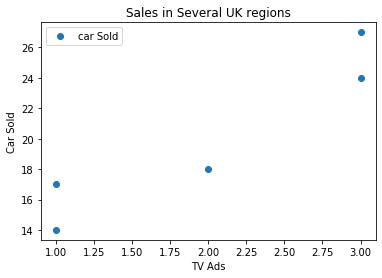

In [5]:
tbl.plot('TV Ads','car Sold',style='o')
plt.ylabel('Car Sold')
plt.title('Sales in Several UK regions')
plt.show()

In [8]:
t= tbl['TV Ads']
c=tbl['car Sold']
import statsmodels.api as sm
t = sm.add_constant(t)
model1= sm.OLS(c,t)
result1 = model1.fit()
print(result1.summary())

C:\Users\RUCHI\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:               car Sold   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     21.43
Date:                Mon, 07 Mar 2022   Prob (F-statistic):             0.0190
Time:                        11:44:33   Log-Likelihood:                -9.6687
No. Observations:                   5   AIC:                             23.34
Df Residuals:                       3   BIC:                             22.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0000      2.366      4.226      0.0

# LINEAR REGRESSION EQUATION FINDING TENSILE STRENGTH TEST SPLIT

In [6]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import pandas as pd

In [25]:
data = pd.read_excel("C:/Users/RUCHI/Downloads/HARDNESS.xls")
data.head()

,Tensile strength,Hardness
0,53.0,29.31
1,70.2,34.86
2,84.3,36.82
3,55.3,30.12
4,78.5,34.02


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x= data['Hardness'].values.reshape(-1,1)
y = data['Tensile strength'].values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =88)

In [10]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((28, 1), (7, 1), (28, 1), (7, 1))

In [11]:
len(x_train)

28

In [12]:
len(x_test)

7

In [13]:
x_train

array([[38.02],
       [34.76],
       [32.18],
       [29.31],
       [23.69],
       [30.12],
       [27.65],
       [29.25],
       [35.4 ],
       [27.99],
       [28.67],
       [31.26],
       [34.02],
       [34.88],
       [29.25],
       [36.82],
       [34.47],
       [24.66],
       [28.71],
       [25.81],
       [34.86],
       [30.82],
       [25.77],
       [37.69],
       [26.46],
       [25.68],
       [31.85],
       [23.21]])

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()


In [15]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
reg.intercept_

array([7.045691])

In [17]:
reg.coef_

array([[1.99777401]])

In [18]:
y_predict = reg.predict(x_test)

In [19]:
y_predict

array([[73.81129842],
       [56.27084261],
       [64.28191639],
       [66.63928973],
       [70.37512713],
       [74.97000735],
       [71.73361345]])

In [20]:
mean_squared_error(y_test,y_predict)

35.71053398209997

In [21]:
reg.score(x_test,y_test)

0.5362243730094254

In [22]:
reg.score(x_train,y_train)

0.4500146647765303

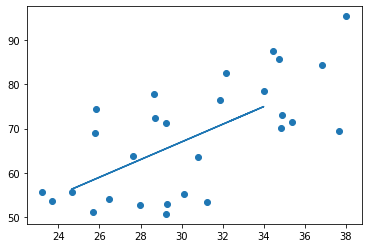

In [24]:
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train)
plt.plot(x_test,y_predict)